In [54]:
from tensorflow import keras as kr
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = kr.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2,\
    random_state= 42)

In [55]:
def model_fn(a_layer = None):
    model = kr.Sequential()
    model.add(kr.layers.Flatten(input_shape=(28,28)))
    model.add(kr.layers.Dense(100, activation= 'relu'))
    if a_layer:
        model.add(a_layer)
    model.add(kr.layers.Dense(10, activation= 'sigmoid'))
    return model

In [56]:
model = model_fn()
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_28 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_57 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [57]:
model = model_fn()
model.compile(loss= 'sparse_categorical_crossentropy', metrics= 'accuracy')
history = model.fit(train_scaled, train_target, epochs= 20, verbose= 0)

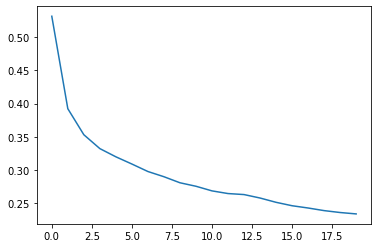

In [58]:
history.history.keys()
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

In [59]:
# 검증 손실
model = model_fn()
model.compile(loss= 'sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, verbose= 0, epochs= 20, validation_data=(val_scaled, val_target))

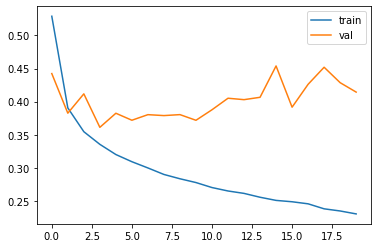

In [60]:
history.history.keys()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.show()

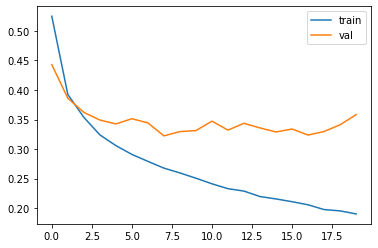

In [61]:
# Adam 옵티마이저 적용
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs= 20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.show()

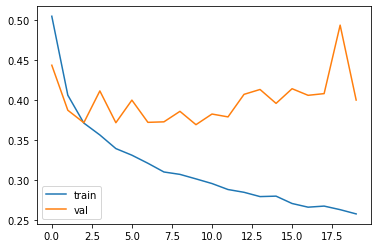

In [62]:
model = model_fn()
opti = kr.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer= opti, loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs= 20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.show()

In [63]:
# 드롭아웃
model = model_fn(kr.layers.Dropout(0.3))
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_33 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_20 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


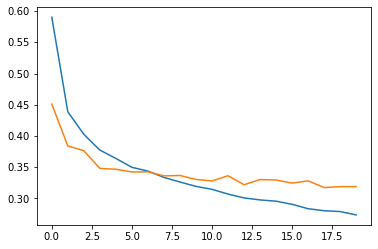

In [64]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= 'accuracy')
history = model.fit(train_scaled, train_target, epochs= 20, verbose= 0, validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [65]:
model = model_fn(kr.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, validation_data=(val_scaled, val_target), verbose= 0)


In [66]:
# 모델 저장
model.save_weights('model-weights.h5') # 훈련한 모델의 파라미터 저장
model.save('model-whole.h5') # 모델의 구조와 파라미터 모두 저장

In [67]:
# 모델 로드
model = model_fn(kr.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

# 파라미터만 로드 후 정획도 검증
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

# 모델 전체를 로드 후 정확도 검증
model = kr.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

0.8825833333333334
375/375 [==============================] - 0s 337us/step - loss: 0.3318 - accuracy: 0.8826


[0.3317863643169403, 0.8825833201408386]

In [78]:
# 콜백
model = model_fn(kr.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = kr.callbacks.ModelCheckpoint('best_model.h5') # 최상의 검증모델을 저장
model.fit(train_scaled, train_target, epochs=20, verbose= 0, validation_data= (val_scaled, val_target), callbacks= [checkpoint_cb])


375/375 [==============================] - 0s 378us/step - loss: 0.3273 - accuracy: 0.8870


[0.32729190587997437, 0.8870000243186951]

In [79]:
model = kr.models.load_model('best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 358us/step - loss: 0.3273 - accuracy: 0.8870


[0.32729190587997437, 0.8870000243186951]

In [82]:
# 조기종료
model = model_fn(kr.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = kr.callbacks.ModelCheckpoint('best_model.h5')
early_stopping_cb = kr.callbacks.EarlyStopping(patience=2, restore_best_weights= True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled,val_target), callbacks= [checkpoint_cb, early_stopping_cb])
print(early_stopping_cb.stopped_epoch)

9
